In [1]:
import numpy as np 
import pandas as pd
pd.options.display.float_format = '{:,.3f}'.format
pd.set_option('display.max_columns', 100)
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from ipywidgets import widgets
from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file




/Users/claudiacastro/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# ca_df = pd.read_parquet('https://easy-money-project-bucket.s3.eu-west-3.amazonaws.com/commercial_activity_df.parquet')

# prod_df = pd.read_parquet('https://easy-money-project-bucket.s3.eu-west-3.amazonaws.com/products_df.parquet')

# sdg_df = pd.read_parquet('https://easy-money-project-bucket.s3.eu-west-3.amazonaws.com/sociodemographic_df.parquet')

In [3]:
# carga del dataset completo
df_full = pd.read_parquet("/Users/claudiacastro/easy_money_project/df_completo.parquet")
# eliminamos columnas que no aportan información
df_full = df_full.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'Unnamed: 0'], axis=1)
# eliminamos duplicados a partir de la columna pk_cid y nos quedamos con el primero
#df_full = df_full.drop_duplicates(subset=['pk_cid', "entry_date"], keep="first")


# df_1 = pd.merge(ca_df,prod_df, how="inner" ,on=['pk_cid','pk_partition'])

# df_2 = pd.merge(df_1,sdg_df, how="inner",on=['pk_cid','pk_partition'])

# df_2.to_parquet("/Users/claudiacastro/easy_money_project/df_completo.parquet")


# modificamos el tipo de dato de las columnas, SIMPLEMENTE CAMBIA EL TIPO DE DATO
df_full["pk_partition"] = pd.to_datetime(df_full["pk_partition"])
df_full["entry_date"] = pd.to_datetime(df_full["entry_date"], errors='coerce')
df_full["entry_channel"] = df_full["entry_channel"].astype('category')
df_full['active_customer'] = df_full['active_customer'].astype('int32')
df_full['segment'] = df_full['segment'].astype('category')
df_full['short_term_deposit'] = df_full['short_term_deposit'].astype('int32')
df_full['loans'] = df_full['loans'].astype('int32')
df_full['mortgage'] = df_full['mortgage'].astype('int32')
df_full['funds'] = df_full['funds'].astype('int32')
df_full['securities'] = df_full['securities'].astype('int32')
df_full['long_term_deposit'] = df_full['long_term_deposit'].astype('int32')
df_full['credit_card'] = df_full['credit_card'].astype('int32')
# df_full['payroll'] = df_full['payroll'].astype('int32')
# df_full['pension_plan'] = df_full['pension_plan'].astype('int32')
df_full['payroll_account'] = df_full['payroll_account'].astype('int32')
df_full['emc_account'] = df_full['emc_account'].astype('int32')
df_full['debit_card'] = df_full['debit_card'].astype('int32')
df_full['em_account_p'] = df_full['em_account_p'].astype('int32')
df_full['em_acount'] = df_full['em_acount'].astype('int32')
df_full["country_id"] = df_full["country_id"].astype('category')
df_full["region_code"] = df_full["region_code"].astype('category')
df_full["gender"] =  df_full["gender"].astype('category')
df_full["age"] = df_full["age"].astype('int32')
df_full["deceased"] = df_full["deceased"].astype('category')
# reporte del dataset
# profile = ProfileReport(df_full, title="Profiling Report Easy Money")
# profile.to_file("profiling_report_easyMoney.html")

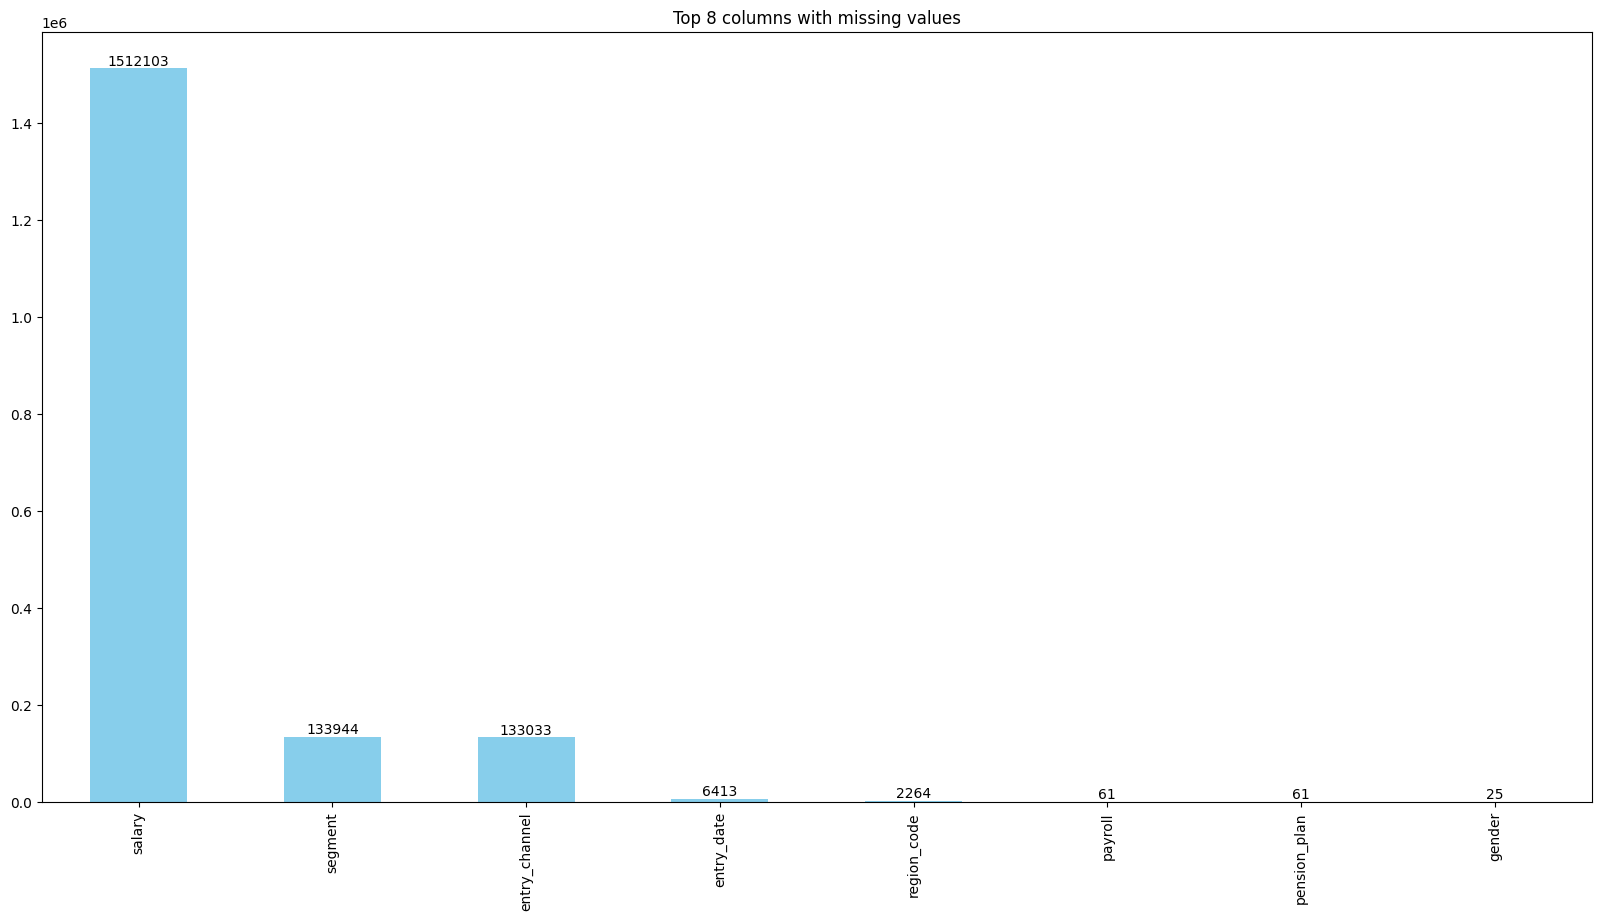

In [4]:
# valores nulos en el dataset

df_full.isna().sum().sort_values(ascending=False).head(8).plot(kind='bar', figsize=(20, 10), color='skyblue')
for i in range(8):
    plt.text(i, df_full.isna().sum().sort_values(ascending=False)[i], df_full.isna().sum().sort_values(ascending=False)[i], ha = 'center', va = 'bottom')
plt.title('Top 8 columns with missing values')
plt.show()



TOTAL DE CLIENTES 

In [5]:
df_full["pk_cid"].nunique()

456373

# ACTIVIDAD COMERCIAL

CLIENTES ACTIVOS

In [6]:
# agrupando los clientes por activos y no activos
df_full.groupby("active_customer")["pk_cid"].nunique()

active_customer
0    317179
1    197731
Name: pk_cid, dtype: int64

In [7]:
df_full.groupby("active_customer")["pk_cid"].nunique().sum()
# se observa que la cantidad de clientes agrupados por activeCustomer
# es mayor que la cantidad de cliente existente (456373)
# lo que significa que hay clientes que presentan más de un estado

514910

Descomposición de los clientes según activeCustomer por clientes: siempre activos, nunca activos, con actividad variable y si presentan nulos.

In [8]:
# Contar cuántos estados diferentes tiene cada cliente en active_customer
estado_por_cliente = df_full.groupby('pk_cid')['active_customer'].agg(['nunique', 'count'])

# Identificar clientes con estados mixtos (0 y 1)
clientes_mixtos = estado_por_cliente[estado_por_cliente['nunique'] > 1].index

# Excluir los clientes mixtos del análisis de las otras categorías
df_no_mixtos = df_full[~df_full['pk_cid'].isin(clientes_mixtos)]

# Identificar clientes que son siempre 0
clientes_siempre_cero = df_no_mixtos.groupby('pk_cid')['active_customer'].min()
clientes_siempre_cero = clientes_siempre_cero[clientes_siempre_cero == 0].index

# Identificar clientes que son siempre 1
clientes_siempre_uno = df_no_mixtos.groupby('pk_cid')['active_customer'].max()
clientes_siempre_uno = clientes_siempre_uno[clientes_siempre_uno == 1].index

# Identificar clientes con valores NaN (excluyendo clientes mixtos)
clientes_con_nan = df_no_mixtos[df_no_mixtos['active_customer'].isna()]['pk_cid'].unique()

# Contar el número de clientes en cada categoría (excluyendo mixtos)
n_siempre_cero = len(clientes_siempre_cero)
n_siempre_uno = len(clientes_siempre_uno)
n_con_nan = len(clientes_con_nan)
n_mixtos = len(clientes_mixtos)

# Mostrar los resultados
print(f"Clientes que son siempre 0 en 'active_customer' (excluyendo mixtos): {n_siempre_cero}")
print(f"Clientes que son siempre 1 en 'active_customer' (excluyendo mixtos): {n_siempre_uno}")
print(f"Clientes con valores NaN en 'active_customer' (excluyendo mixtos): {n_con_nan}")
print(f"Clientes con estados mixtos (0 y 1): {n_mixtos}")
print(f"Total de clientes en el dataset: {n_siempre_cero + n_siempre_uno + n_con_nan + n_mixtos}")


Clientes que son siempre 0 en 'active_customer' (excluyendo mixtos): 258642
Clientes que son siempre 1 en 'active_customer' (excluyendo mixtos): 139194
Clientes con valores NaN en 'active_customer' (excluyendo mixtos): 0
Clientes con estados mixtos (0 y 1): 58537
Total de clientes en el dataset: 456373


In [9]:
# porcientos de lo anterior
total_clientes = n_siempre_cero + n_siempre_uno + n_con_nan + n_mixtos
porc_siempre_cero = n_siempre_cero / total_clientes * 100
porc_siempre_uno = n_siempre_uno / total_clientes * 100
porc_con_nan = n_con_nan / total_clientes * 100
porc_mixtos = n_mixtos / total_clientes * 100

# Mostrar los resultados
print(f"Clientes que son siempre 0 en 'active_customer' (excluyendo mixtos): {porc_siempre_cero:.2f}%")
print(f"Clientes que son siempre 1 en 'active_customer' (excluyendo mixtos): {porc_siempre_uno:.2f}%")
print(f"Clientes con valores NaN en 'active_customer' (excluyendo mixtos): {porc_con_nan:.2f}%")
print(f"Clientes con estados mixtos (0 y 1): {porc_mixtos:.2f}%")
print(f"Total de clientes active_customer : {total_clientes}") 
print(f"Total de clientes en el dataset: {df_full['pk_cid'].nunique()}")



Clientes que son siempre 0 en 'active_customer' (excluyendo mixtos): 56.67%
Clientes que son siempre 1 en 'active_customer' (excluyendo mixtos): 30.50%
Clientes con valores NaN en 'active_customer' (excluyendo mixtos): 0.00%
Clientes con estados mixtos (0 y 1): 12.83%
Total de clientes active_customer : 456373
Total de clientes en el dataset: 456373


In [10]:
# grafico de barras con los porcentajes anteriores

#plt.figure(figsize=(10, 6))
#plt.bar(['Siempre 0', 'Siempre 1', 'NaN', 'Mixtos'], [porc_siempre_cero, porc_siempre_uno, porc_con_nan, porc_mixtos])
#plt.ylabel('Porcentaje de clientes')
#plt.title('Distribución de los clientes en active_customer')
#plt.show()


CLIENTES SEGUN ENTRY_CHANNEL

In [11]:
df_full["entry_channel"] = df_full["entry_channel"].cat.add_categories(["Unknown"]).fillna("Unknown")
df_full["entry_channel"].value_counts().head(20).apply(lambda x: x/df_full["entry_channel"].count()*100)

entry_channel
KHE       52.222
KFC       14.936
KHQ        9.899
KAT        6.978
KHK        3.860
KHM        2.961
Unknown    2.231
KHN        1.818
KFA        1.325
KHD        1.273
RED        1.016
KHL        0.700
KHF        0.346
KHO        0.138
KAZ        0.095
KHC        0.088
KBG        0.028
KEH        0.012
KHP        0.012
007        0.010
Name: count, dtype: float64

In [12]:
df_full["entry_channel"].value_counts().head(20)

entry_channel
KHE        3113947
KFC         890620
KHQ         590280
KAT         416084
KHK         230197
KHM         176591
Unknown     133033
KHN         108434
KFA          79020
KHD          75899
RED          60601
KHL          41736
KHF          20657
KHO           8247
KAZ           5635
KHC           5241
KBG           1662
KEH            728
KHP            691
007            613
Name: count, dtype: int64

In [13]:
df_full.groupby("entry_channel")["pk_cid"].nunique()

entry_channel
004             1
007            50
013            30
KAA            18
KAB             8
            ...  
KHP            86
KHQ         76372
KHS             5
RED          5279
Unknown    132201
Name: pk_cid, Length: 69, dtype: int64

In [14]:

# Contar cuántos valores únicos tiene cada cliente en la columna entry_channel
estado_por_cliente_channel = df_full.groupby('pk_cid')['entry_channel'].agg(['nunique', 'count'])

# Identificar clientes con canales de entrada mixtos (más de un valor en entry_channel)
clientes_mixtos_channel = estado_por_cliente_channel[estado_por_cliente_channel['nunique'] > 1].index

# Excluir los clientes mixtos del análisis de las otras categorías
df_no_mixtos_channel = df_full[~df_full['pk_cid'].isin(clientes_mixtos_channel)]

# Identificar clientes que siempre usaron un solo canal de entrada (excluyendo mixtos)
clientes_un_canal = df_no_mixtos_channel.groupby('entry_channel')['pk_cid'].nunique()

# Identificar clientes con valores NaN en entry_channel (excluyendo clientes mixtos)
clientes_con_nan_channel = df_no_mixtos_channel[df_no_mixtos_channel['entry_channel'].isna()]['pk_cid'].unique()

# Contar el número de clientes en cada categoría (excluyendo mixtos)
n_un_canal = clientes_un_canal.sum()
n_con_nan_channel = len(clientes_con_nan_channel)
n_mixtos_channel = len(clientes_mixtos_channel)

# Mostrar los resultados
print(f"Clientes que siempre usaron un solo canal de entrada (excluyendo mixtos): {n_un_canal}")
print(f"Clientes con valores NaN en 'entry_channel' (excluyendo mixtos): {n_con_nan_channel}")
print(f"Clientes con canales de entrada mixtos: {n_mixtos_channel}")

Clientes que siempre usaron un solo canal de entrada (excluyendo mixtos): 331869
Clientes con valores NaN en 'entry_channel' (excluyendo mixtos): 0
Clientes con canales de entrada mixtos: 124504


In [15]:
# Contar cuántos valores únicos tiene cada cliente en la columna entry_channel
estado_por_cliente_channel = df_full.groupby('pk_cid')['entry_channel'].agg(['nunique', 'count'])

# Identificar clientes con canales de entrada mixtos (más de un valor en entry_channel)
clientes_mixtos_channel = estado_por_cliente_channel[estado_por_cliente_channel['nunique'] > 1].index

# Excluir los clientes mixtos del análisis de las otras categorías
df_no_mixtos_channel = df_full[~df_full['pk_cid'].isin(clientes_mixtos_channel)]

# Contar clientes únicos para cada canal de entrada
clientes_por_canal = df_no_mixtos_channel.groupby('entry_channel')['pk_cid'].nunique()

# Contar el número de clientes con valores NaN en entry_channel
clientes_con_nan_channel = df_no_mixtos_channel[df_no_mixtos_channel['entry_channel'].isna()]['pk_cid'].nunique()


# Mostrar los resultados
print(f"Clientes únicos por canal de entrada (excluyendo mixtos):")
print(clientes_por_canal.sort_values(ascending=False).head(10))
print(f"\nClientes con valores NaN en 'entry_channel' (excluyendo mixtos): {clientes_con_nan_channel}")
print(f"\nClientes con canales de entrada mixtos: {len(clientes_mixtos_channel)}")

Clientes únicos por canal de entrada (excluyendo mixtos):
entry_channel
KHE        196417
KFC         59149
KAT         26432
KHK         15825
Unknown      8921
KHD          4845
KFA          4758
KHM          3538
KHN          3238
RED          2927
Name: pk_cid, dtype: int64

Clientes con valores NaN en 'entry_channel' (excluyendo mixtos): 0

Clientes con canales de entrada mixtos: 124504


Existen muchos canales de captación de clientes siendo los principales KHE, KFC, KAT, KHK   



In [16]:
print(f" Porcentaje de clientes por canales de entrada unicos: {clientes_por_canal.sum()/df_full['pk_cid'].nunique()*100}")
print(f" Porcentaje de clientes por canales de entrada mixtos: {len(clientes_mixtos_channel)/df_full['pk_cid'].nunique()*100}")

 Porcentaje de clientes por canales de entrada unicos: 72.71880676551855
 Porcentaje de clientes por canales de entrada mixtos: 27.281193234481442


Del total de clientes de captados por canales únicos este es su porcentaje, manteniendose los canales principales y hay algunos canales que estan a cero, es decir, que no tienen ningun cliente por que se encuentran dentro de canales de entrada mixtos, que mas adelante se analiza. 

In [17]:
# porcentaje de clientes por canal de entrada unico
clientes_por_canal = clientes_por_canal.reset_index()
clientes_por_canal.rename(columns={"entry_channel": "canal_entrada", "pk_cid": "cant_clientes"}, inplace=True)
clientes_por_canal["porcentaje"] = clientes_por_canal["cant_clientes"].apply(lambda x: x/df_full["pk_cid"].nunique()*100)
clientes_por_canal = clientes_por_canal.sort_values(by="porcentaje", ascending=False)
clientes_por_canal

,canal_entrada,cant_clientes,porcentaje
57,KHE,196417,43.039
45,KFC,59149,12.961
17,KAT,26432,5.792
59,KHK,15825,3.468
68,Unknown,8921,1.955
...,...,...,...
21,KBE,1,0.000
10,KAI,1,0.000
34,KCL,1,0.000
35,KDA,0,0.000


In [18]:
# comprobación de los resultados anteriores sean iguales a la cantidad de clientes  
clientes_por_canal["cant_clientes"].sum()+ len(clientes_mixtos_channel)

456373

CLIENTES SEGUN ENTRY DATE

Analisis de la fechas de contratacion por cliente

In [19]:
# Contar cuántos valores únicos de 'entry_date' tiene cada cliente
estado_por_cliente_fecha = df_full.groupby('pk_cid')['entry_date'].nunique()

# Identificar clientes con fechas de registro mixtas (múltiples fechas de registro)
clientes_mixtos_fecha = estado_por_cliente_fecha[estado_por_cliente_fecha > 1].index

# Excluir los clientes mixtos del análisis de las otras categorías
df_no_mixtos_fecha = df_full[~df_full['pk_cid'].isin(clientes_mixtos_fecha)]

# Identificar clientes que tienen siempre la misma fecha de registro
clientes_misma_fecha = df_no_mixtos_fecha.groupby('pk_cid')['entry_date'].nunique()
clientes_misma_fecha = clientes_misma_fecha[clientes_misma_fecha == 1].index

# Identificar clientes con valores NaN en 'entry_date' (excluyendo clientes mixtos)
clientes_con_nan_fecha = df_no_mixtos_fecha[df_no_mixtos_fecha['entry_date'].isna()]['pk_cid'].unique()

# Contar el número de clientes en cada categoría (excluyendo mixtos)
n_misma_fecha = len(clientes_misma_fecha)
n_con_nan_fecha = len(clientes_con_nan_fecha)
n_mixtos_fecha = len(clientes_mixtos_fecha)

# Mostrar los resultados
print(f"Clientes que tienen siempre la misma fecha de registro: {n_misma_fecha}")
print(f"Clientes con todos los valores NaN en 'entry_date' en todas las particiones: {n_con_nan_fecha}")
print(f"Clientes con fechas de registro mixtas (diferentes fechas): {n_mixtos_fecha}")

Clientes que tienen siempre la misma fecha de registro: 454892
Clientes con todos los valores NaN en 'entry_date' en todas las particiones: 1474
Clientes con fechas de registro mixtas (diferentes fechas): 7


In [20]:
n_total = n_misma_fecha + n_con_nan_fecha + n_mixtos_fecha
n_total
# se comprueba que la suma de los clientes en cada fecha de contratación es igual a la cantidad de clientes únicos

456373

In [21]:
# se crea un dataframe con los clientes que tienen siempre la misma fecha de registro
# no se tiene en cuenta los clientes con valores NaN en 'entry_date', ni los clientes con fechas de registro mixtas
# estos valores se excluyen del análisis y se tienen en cuenta más adelante
misma_fecha_clientes = df_full[df_full['pk_cid'].isin(clientes_misma_fecha)]

<Axes: title={'center': 'Number of customers by date'}, xlabel='entry_date'>

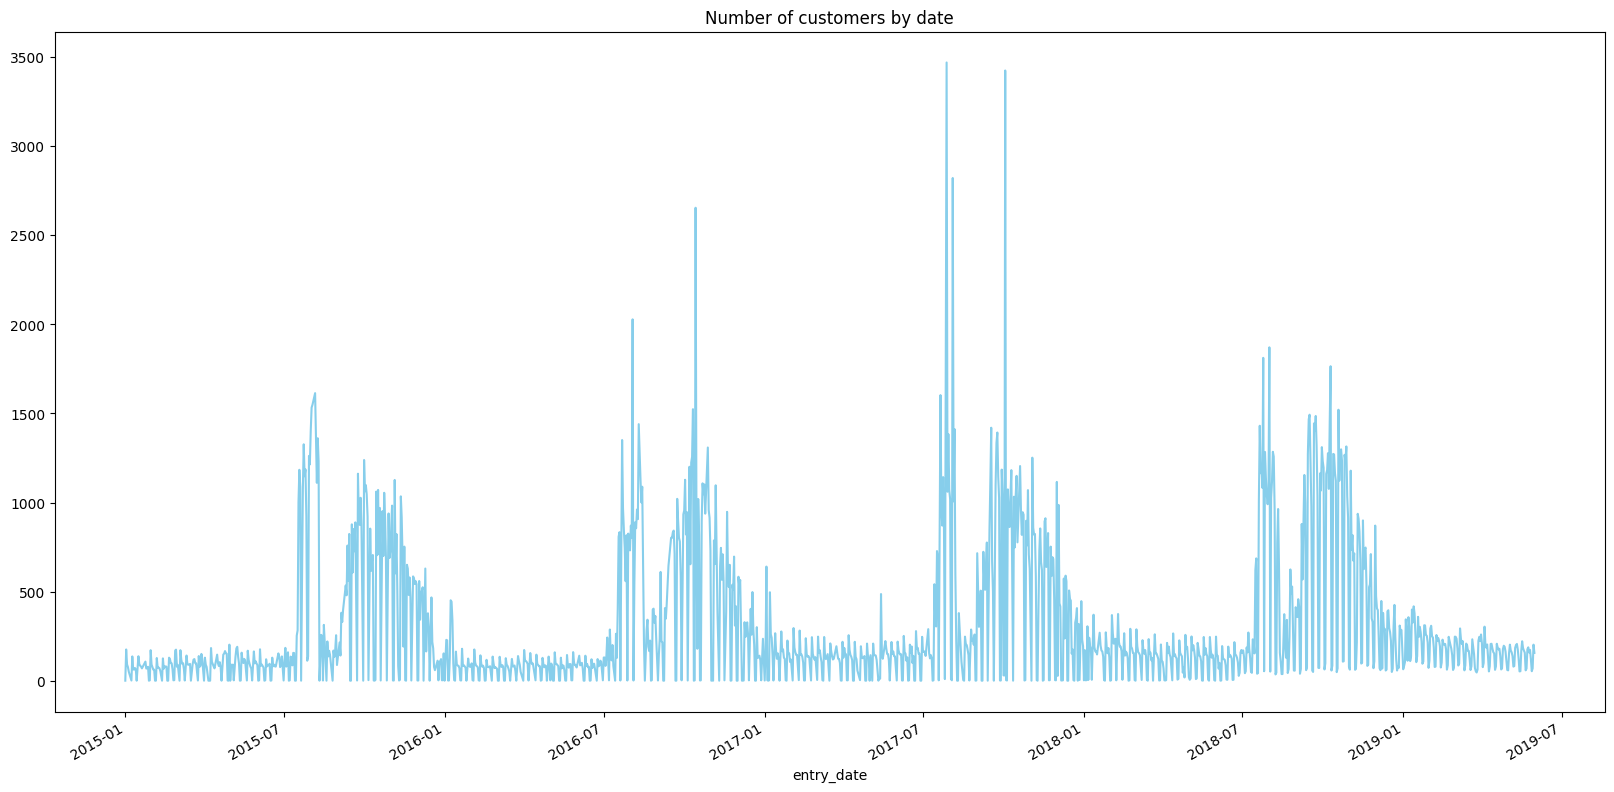

In [22]:
misma_fecha_clientes.groupby("entry_date")["pk_cid"].nunique().plot(kind='line', figsize=(20, 10), color='skyblue', title='Number of customers by date')

El gráfico muestra que hay ciclos claros en la actividad de adquisición de clientes, con picos notables que podrían estar vinculados a eventos específicos, y una estabilización hacia el final del periodo. Analizar más a fondo las causas de estos picos podría proporcionar insights valiosos para futuras estrategias de crecimiento.

Los períodos principales son: Mediados de Julio hasta mediados de Agosto y desde Septiembre hasta mediados de Agosto y también a inicios de Enero, para cada año.

In [23]:
# con este codigo sacamos el grafico anterior de forma de dinamica con plotly, solo descomentar la linea final

import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo

# Agrupar los datos por 'entry_date' y contar el número de clientes únicos por día
clientes_por_dia = misma_fecha_clientes.groupby("entry_date")["pk_cid"].nunique()

# Crear la traza para Plotly
trace = go.Scatter(
    x=clientes_por_dia.index,
    y=clientes_por_dia.values,
    mode='lines+markers',
    name='Clientes por Día',
    line=dict(color='skyblue')
)

# Definir el layout del gráfico
layout = go.Layout(
    title='Number of Customers by Date',
    xaxis=dict(title='Fecha'),
    yaxis=dict(title='Número de Clientes'),
    hovermode='closest'
)

# Crear la figura
fig = go.Figure(data=[trace], layout=layout)

# Mostrar el gráfico dinámico
#pyo.plot(fig, filename='clientes_por_dia.html')

SEGMENTACIÓN DE CLIENTES

Analizando de forma general el comportamiento de la segmentacion de los clientes

In [24]:
# Contar cuántos valores únicos de 'segment' tiene cada cliente
estado_por_cliente_segment = df_full.groupby('pk_cid')['segment'].nunique()

# Identificar clientes con segmentos mixtos (múltiples segmentos)
clientes_mixtos_segment = estado_por_cliente_segment[estado_por_cliente_segment > 1].index

# Excluir los clientes mixtos del análisis de las otras categorías
df_no_mixtos_segment = df_full[~df_full['pk_cid'].isin(clientes_mixtos_segment)]

# Identificar clientes que tienen siempre el mismo segmento
clientes_mismo_segment = df_no_mixtos_segment.groupby('pk_cid')['segment'].nunique()
clientes_mismo_segment = clientes_mismo_segment[clientes_mismo_segment == 1].index

# Identificar clientes con valores NaN en 'segment' (excluyendo clientes mixtos)
clientes_con_nan_segment = df_no_mixtos_segment[df_no_mixtos_segment['segment'].isna()]['pk_cid'].unique()

# Contar el número de clientes en cada categoría (excluyendo mixtos)
n_mismo_segment = len(clientes_mismo_segment)
n_con_nan_segment = len(clientes_con_nan_segment)
n_mixtos_segment = len(clientes_mixtos_segment)

# Mostrar los resultados
print(f"Clientes que tienen siempre el mismo 'segment' (excluyendo mixtos): {n_mismo_segment}")
print(f"Clientes con valores NaN en 'segment' (excluyendo mixtos): {n_con_nan_segment}")
print(f"Clientes con segmentos mixtos (diferentes segmentos): {n_mixtos_segment}")

Clientes que tienen siempre el mismo 'segment' (excluyendo mixtos): 434906
Clientes con valores NaN en 'segment' (excluyendo mixtos): 126328
Clientes con segmentos mixtos (diferentes segmentos): 12717


Entrando más a detalle:

In [25]:
# Contar cuántos valores únicos de 'segment' tiene cada cliente
estado_por_cliente_segment = df_full.groupby('pk_cid')['segment'].nunique()

# Identificar clientes con segmentos mixtos (múltiples segmentos)
clientes_mixtos_segment = estado_por_cliente_segment[estado_por_cliente_segment > 1].index

# Excluir los clientes mixtos del análisis de las otras categorías
df_no_mixtos_segment = df_full[~df_full['pk_cid'].isin(clientes_mixtos_segment)]

# Análisis por cada categoría específica
categorias = ['03 - UNIVERSITARIO', '02 - PARTICULARES', 'Unknown', '01 - TOP']

# Diccionarios para almacenar los pk_cid y los conteos por categoría
pkcid_categorias = {}
conteo_categorias = {}

for categoria in categorias:
    # Identificar clientes que son siempre de la misma categoría
    clientes_siempre_categoria = df_no_mixtos_segment[df_no_mixtos_segment['segment'] == categoria]['pk_cid'].unique()
    
    # Guardar los pk_cid y el conteo en los diccionarios
    pkcid_categorias[categoria] = clientes_siempre_categoria
    conteo_categorias[categoria] = len(clientes_siempre_categoria)

# Identificar clientes con valores NaN en 'segment' (excluyendo clientes mixtos)
clientes_con_nan_segment = df_no_mixtos_segment[df_no_mixtos_segment['segment'].isna()]['pk_cid'].unique()

# Contar el número de clientes en cada categoría (excluyendo mixtos)
n_con_nan_segment = len(clientes_con_nan_segment)
n_mixtos_segment = len(clientes_mixtos_segment)

# Mostrar los resultados
print("Resultados por Categoría de 'segment' (excluyendo mixtos):")
for categoria, count in conteo_categorias.items():
    print(f"Clientes que son siempre '{categoria}': {count}")

print(f"Clientes con valores NaN en 'segment' (excluyendo mixtos): {n_con_nan_segment}")
print(f"Clientes con segmentos mixtos (diferentes segmentos): {n_mixtos_segment}")

# Ahora tienes las pk_cid guardadas en pkcid_categorias para cada categoría
# Por ejemplo, los pk_cid para '03 - UNIVERSITARIO' están en pkcid_categorias['03 - UNIVERSITARIO']

Resultados por Categoría de 'segment' (excluyendo mixtos):
Clientes que son siempre '03 - UNIVERSITARIO': 282009
Clientes que son siempre '02 - PARTICULARES': 148153
Clientes que son siempre 'Unknown': 0
Clientes que son siempre '01 - TOP': 4744
Clientes con valores NaN en 'segment' (excluyendo mixtos): 126328
Clientes con segmentos mixtos (diferentes segmentos): 12717


In [26]:
# tengo un dicccionario con el conteo de clientes por categoria, solo faltan los clientes mixtos
# que se encuentran en la variable clientes_mixtos_segment
conteo_categorias
# tengo un diccionario con los clientes por categoria, solo faltan los clientes mixtos
# que se encuentran en la variable clientes_mixtos_segment
pkcid_categorias

{'03 - UNIVERSITARIO': array([1050611, 1050612, 1050613, ..., 1012673, 1254119, 1148863]),
 '02 - PARTICULARES': array([1375586, 1050624, 1050604, ..., 1185089, 1171168, 1172945]),
 'Unknown': array([], dtype=int64),
 '01 - TOP': array([1050360, 1051725, 1052121, ..., 1015626, 1220415, 1117175])}

In [27]:
# se comprueba que la suma de los clientes en cada segmento es igual a la cantidad de clientes únicos
sum(list(conteo_categorias.values())) + n_con_nan_segment + n_mixtos_segment

573951

In [28]:
# quiero llevar lo anterior a porcentajes
# porcentaje de clientes por segmento
# porcentaje de clientes por segmento ya con todos los clientes
total_clientes = sum(list(conteo_categorias.values())) + n_con_nan_segment + n_mixtos_segment
porcentaje_clientes = {}
for key, value in conteo_categorias.items():
    porcentaje_clientes[key] = value/total_clientes*100
porcentaje_clientes["Mixtos"] = len(clientes_mixtos_segment)/total_clientes*100
porcentaje_clientes


{'03 - UNIVERSITARIO': 49.13468222897077,
 '02 - PARTICULARES': 25.812830712029424,
 'Unknown': 0.0,
 '01 - TOP': 0.8265513955024036,
 'Mixtos': 2.2156943711222734}

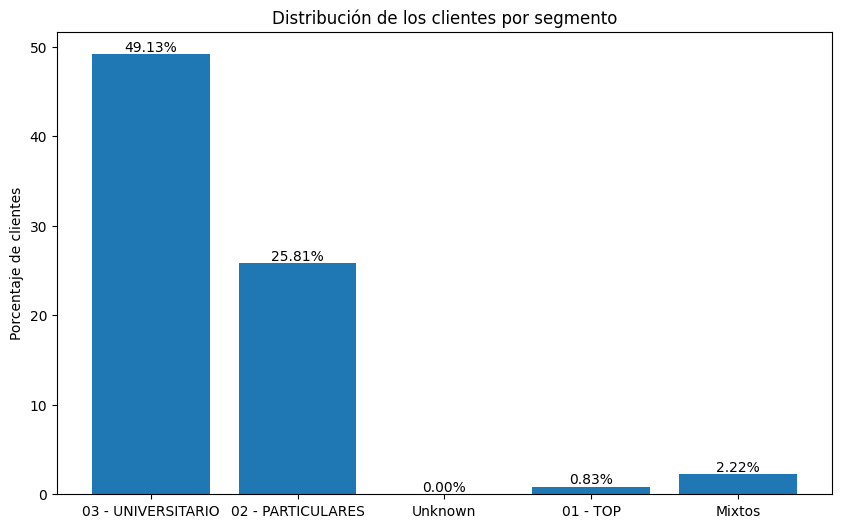

In [29]:
# grafico de barras de porcentaje_clientes
plt.figure(figsize=(10, 6))
plt.bar(porcentaje_clientes.keys(), porcentaje_clientes.values())
plt.ylabel('Porcentaje de clientes')
plt.title('Distribución de los clientes por segmento')
for i in range(len(porcentaje_clientes)):
    plt.text(i, list(porcentaje_clientes.values())[i], f"{list(porcentaje_clientes.values())[i]:.2f}%", ha = 'center', va = 'bottom')
plt.show()

CLIENTES POR PK_PARTITION

In [30]:
# Contar cuántos valores únicos de 'pk_partition' tiene cada cliente
estado_por_cliente_partition = df_full.groupby('pk_cid')['pk_partition'].nunique()

# Identificar clientes con particiones mixtas (múltiples particiones)
clientes_mixtos_partition = estado_por_cliente_partition[estado_por_cliente_partition > 1].index

# Excluir los clientes mixtos del análisis de las otras categorías
df_no_mixtos_partition = df_full[~df_full['pk_cid'].isin(clientes_mixtos_partition)]

# Identificar clientes que están asociados a una única partición
clientes_una_particion = df_no_mixtos_partition.groupby('pk_cid')['pk_partition'].nunique()
clientes_una_particion = clientes_una_particion[clientes_una_particion == 1].index

# Identificar clientes con valores NaN en 'pk_partition' (excluyendo clientes mixtos)
clientes_con_nan_partition = df_no_mixtos_partition[df_no_mixtos_partition['pk_partition'].isna()]['pk_cid'].unique()

# Contar el número de clientes en cada categoría (excluyendo mixtos)
n_una_particion = len(clientes_una_particion)
n_con_nan_partition = len(clientes_con_nan_partition)
n_mixtos_partition = len(clientes_mixtos_partition)

# Mostrar los resultados
print(f"Clientes que están asociados a una única partición, que no se repiten más de una vez: {n_una_particion}")
print(f"Clientes con valores NaN en 'pk_partition': {n_con_nan_partition}")
print(f"Clientes que se repiten en al menos 2 particiones: {n_mixtos_partition}")

Clientes que están asociados a una única partición, que no se repiten más de una vez: 8814
Clientes con valores NaN en 'pk_partition': 0
Clientes que se repiten en al menos 2 particiones: 447559


ANALISIS PARA LA IDENTIFICACION DE CLIENTES NUEVOS EN CADA PARTICION CON RESPECTO A LA ANTERIOR

In [31]:
# Ordenar los datos por 'pk_partition' y 'pk_cid'
df_full = df_full.sort_values(by=['pk_partition', 'pk_cid'])

# Obtener una lista única de particiones ordenadas
particiones = df_full['pk_partition'].unique()

# Crear un diccionario para almacenar el número de clientes en la primera partición y los nuevos clientes por cada partición
clientes_por_particion = {}

# Mantener un conjunto de todos los clientes vistos hasta la partición actual
clientes_acumulados = set()

# Iterar sobre las particiones
for particion in particiones:
    # Obtener los clientes de la partición actual
    clientes_actuales = set(df_full[df_full['pk_partition'] == particion]['pk_cid'])
    
    # Identificar nuevos clientes en la partición actual excluyendo los ya vistos
    nuevos_en_particion_actual = clientes_actuales - clientes_acumulados
    
    # Almacenar el número de nuevos clientes en el diccionario
    clientes_por_particion[particion] = len(nuevos_en_particion_actual)
    
    # Actualizar el conjunto acumulado con los clientes actuales
    clientes_acumulados.update(clientes_actuales)

# Convertir el diccionario en un DataFrame para su análisis
df_clientes_por_particion = pd.DataFrame(list(clientes_por_particion.items()), columns=['pk_partition', 'num_clientes'])

# Mostrar los resultados
print(df_clientes_por_particion)

   pk_partition  num_clientes
0    2018-01-28        239493
1    2018-02-28          3767
2    2018-03-28          3411
3    2018-04-28          2952
4    2018-05-28          3031
5    2018-06-28          2845
6    2018-07-28         83840
7    2018-08-28         14596
8    2018-09-28         23353
9    2018-10-28         28205
10   2018-11-28         15557
11   2018-12-28          7402
12   2019-01-28          6926
13   2019-02-28          6193
14   2019-03-28          5690
15   2019-04-28          4581
16   2019-05-28          4531


In [32]:
# comprobando que la suma de los clientes por particion sea igual a la cantidad de clientes unicos
df_clientes_por_particion["num_clientes"].sum()

456373

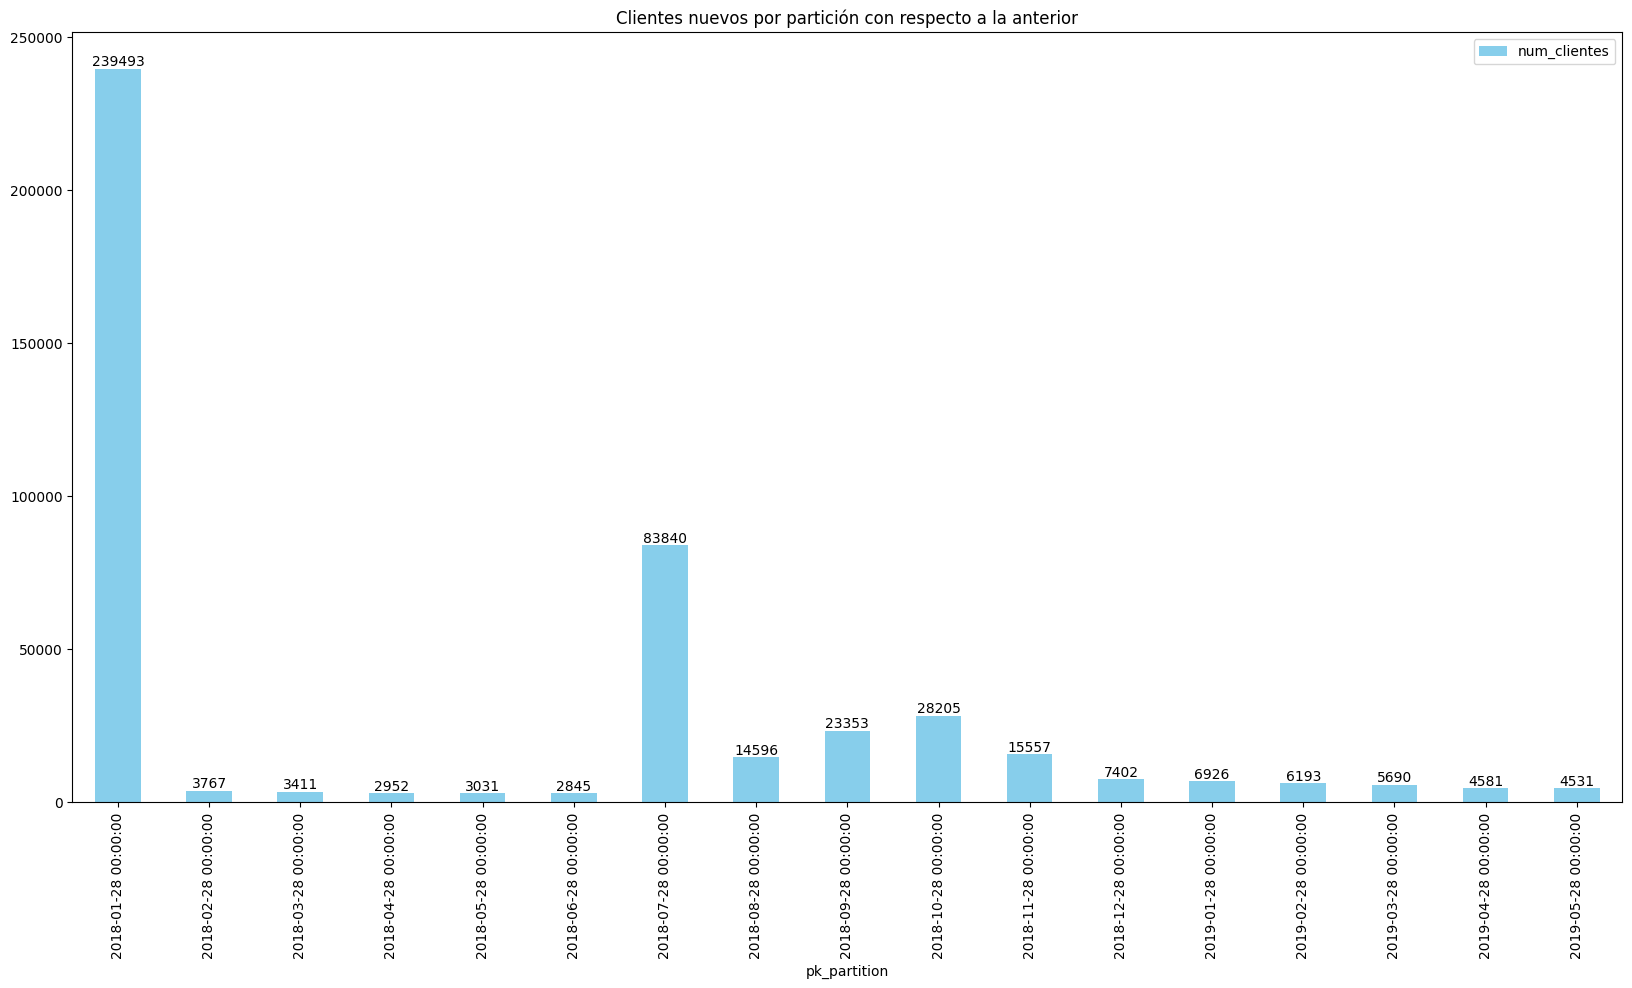

In [33]:
df_clientes_por_particion.plot(kind='bar', x='pk_partition', y='num_clientes', figsize=(20, 10), color='skyblue', title='Clientes nuevos por partición con respecto a la anterior')  
for i in range(len(df_clientes_por_particion)):
    plt.text(i, df_clientes_por_particion['num_clientes'][i], df_clientes_por_particion['num_clientes'][i], ha = 'center', va = 'bottom')
plt.show()



# SOCIODEMOGRAPHIC

CLIENTES POR AGE

In [34]:
# Contar cuántos valores únicos de 'age' tiene cada cliente
estado_por_cliente_age = df_full.groupby('pk_cid')['age'].nunique()

# Identificar clientes con edades mixtas (múltiples valores en 'age')
clientes_mixtos_age = estado_por_cliente_age[estado_por_cliente_age > 1].index

# Excluir los clientes mixtos del análisis de las otras categorías
df_no_mixtos_age = df_full[~df_full['pk_cid'].isin(clientes_mixtos_age)]

# Identificar clientes que tienen siempre la misma edad
clientes_misma_edad = df_no_mixtos_age.groupby('pk_cid')['age'].nunique()
clientes_misma_edad = clientes_misma_edad[clientes_misma_edad == 1].index

# Identificar clientes con valores NaN en 'age' (excluyendo clientes mixtos)
clientes_con_nan_age = df_no_mixtos_age[df_no_mixtos_age['age'].isna()]['pk_cid'].unique()

# Contar el número de clientes en cada categoría (excluyendo mixtos)
n_misma_edad = len(clientes_misma_edad)
n_con_nan_age = len(clientes_con_nan_age)
n_mixtos_age = len(clientes_mixtos_age)

# Mostrar los resultados
print(f"Clientes que tienen siempre la misma edad (excluyendo mixtos): {n_misma_edad}")
print(f"Clientes con valores NaN en 'age' (excluyendo mixtos): {n_con_nan_age}")
print(f"Clientes con edades mixtas (diferentes valores de edad): {n_mixtos_age}")

Clientes que tienen siempre la misma edad (excluyendo mixtos): 114631
Clientes con valores NaN en 'age' (excluyendo mixtos): 0
Clientes con edades mixtas (diferentes valores de edad): 341742


In [35]:
n_total = n_misma_edad + n_con_nan_age + n_mixtos_age
n_total

456373

In [36]:
df_misma_edad = df_full[df_full['pk_cid'].isin(clientes_misma_edad)]
df_edad_mixta = df_full[df_full['pk_cid'].isin(clientes_mixtos_age)]

In [37]:
df_misma_edad["age"].describe()

count   1,200,493.000
mean           29.994
std            12.052
min             2.000
25%            22.000
50%            25.000
75%            35.000
max           102.000
Name: age, dtype: float64

In [38]:
df_edad_mixta["age"].describe()

count   4,762,431.000
mean           29.702
std            11.962
min             2.000
25%            22.000
50%            24.000
75%            34.000
max           105.000
Name: age, dtype: float64

aquí se tomará la decisión de trabajar con la última edad del cliente, también hay que considerar que hay valores entre 2 y 18 años que creo que no son adecuados para la ultilizacion de una aplicacion así y revisar tambien los valores mayores de 100 años

CLIENTES POR COUNTRY ID

In [39]:
# Contar cuántos valores únicos de 'country_id' tiene cada cliente
estado_por_cliente_country = df_full.groupby('pk_cid')['country_id'].nunique()

# Identificar clientes con 'country_id' mixtos (múltiples valores de 'country_id')
clientes_mixtos_country = estado_por_cliente_country[estado_por_cliente_country > 1].index

# Excluir los clientes mixtos del análisis de las otras categorías
df_no_mixtos_country = df_full[~df_full['pk_cid'].isin(clientes_mixtos_country)]

# Identificar clientes que tienen siempre el mismo 'country_id'
clientes_mismo_country = df_no_mixtos_country.groupby('pk_cid')['country_id'].nunique()
clientes_mismo_country = clientes_mismo_country[clientes_mismo_country == 1].index

# Identificar clientes con valores NaN en 'country_id' (excluyendo clientes mixtos)
clientes_con_nan_country = df_no_mixtos_country[df_no_mixtos_country['country_id'].isna()]['pk_cid'].unique()

# Contar el número de clientes en cada categoría (excluyendo mixtos)
n_mismo_country = len(clientes_mismo_country)
n_con_nan_country = len(clientes_con_nan_country)
n_mixtos_country = len(clientes_mixtos_country)

# Mostrar los resultados
print(f"Clientes que tienen siempre el mismo 'country_id' (excluyendo mixtos): {n_mismo_country}")
print(f"Clientes con valores NaN en 'country_id' (excluyendo mixtos): {n_con_nan_country}")
print(f"Clientes con 'country_id' mixtos (diferentes países): {n_mixtos_country}")

Clientes que tienen siempre el mismo 'country_id' (excluyendo mixtos): 456348
Clientes con valores NaN en 'country_id' (excluyendo mixtos): 0
Clientes con 'country_id' mixtos (diferentes países): 25


Los clientes con country id distintos como que antes vivian en un pais y ahora se han mudado para otro, no sé como tratar esto, si mantener el ultimo o el primero

CLIENTES POR DECEASED

In [40]:
import pandas as pd

# Contar cuántos valores únicos de 'deceased' tiene cada cliente
estado_por_cliente_deceased = df_full.groupby('pk_cid')['deceased'].nunique()

# Identificar clientes con estados mixtos (N y S o con NaN incluido)
clientes_mixtos_deceased = estado_por_cliente_deceased[estado_por_cliente_deceased > 1].index

# Excluir los clientes mixtos del análisis de las otras categorías
df_no_mixtos_deceased = df_full[~df_full['pk_cid'].isin(clientes_mixtos_deceased)]

# Identificar clientes que son siempre 'N'
clientes_siempre_n = df_no_mixtos_deceased[df_no_mixtos_deceased['deceased'] == 'N']['pk_cid'].unique()

# Identificar clientes que son siempre 'S'
clientes_siempre_s = df_no_mixtos_deceased[df_no_mixtos_deceased['deceased'] == 'S']['pk_cid'].unique()

# Identificar clientes con valores NaN en 'deceased' (excluyendo clientes mixtos)
clientes_con_nan_deceased = df_no_mixtos_deceased[df_no_mixtos_deceased['deceased'].isna()]['pk_cid'].unique()

# Contar el número de clientes en cada categoría (excluyendo mixtos)
n_siempre_n = len(clientes_siempre_n)
n_siempre_s = len(clientes_siempre_s)
n_con_nan_deceased = len(clientes_con_nan_deceased)
n_mixtos_deceased = len(clientes_mixtos_deceased)

# Mostrar los resultados
print(f"Clientes que son siempre 'N' en 'deceased' (excluyendo mixtos): {n_siempre_n}")
print(f"Clientes que son siempre 'S' en 'deceased' (excluyendo mixtos): {n_siempre_s}")
print(f"Clientes con valores NaN en 'deceased' (excluyendo mixtos): {n_con_nan_deceased}")
print(f"Clientes con estados mixtos en 'deceased' (N, S o NaN): {n_mixtos_deceased}")

Clientes que son siempre 'N' en 'deceased' (excluyendo mixtos): 456244
Clientes que son siempre 'S' en 'deceased' (excluyendo mixtos): 55
Clientes con valores NaN en 'deceased' (excluyendo mixtos): 0
Clientes con estados mixtos en 'deceased' (N, S o NaN): 74


In [41]:
n_total = n_siempre_n + n_siempre_s + n_con_nan_deceased + n_mixtos_deceased
n_total

456373

hay 55 clientes muertos desde la primera ingesta de datos incluido el entry_date, serán errores o se tendrán que analizar mas a fondo así como los que cambian

TOTAL DE CLIENTES POR GENDER

In [42]:
# se crea una categoria Unknown para los valores nulos
df_full["gender"] = df_full["gender"].cat.add_categories(["Unknown"]).fillna("Unknown")

df_full.groupby("gender")["pk_cid"].nunique().apply(lambda x: x/df_full["pk_cid"].nunique()*100)

gender
H         51.244
V         48.765
Unknown    0.000
Name: pk_cid, dtype: float64

In [43]:
df_full.groupby("gender")["pk_cid"].nunique()

gender
H          233862
V          222550
Unknown         2
Name: pk_cid, dtype: int64

In [44]:
df_full.groupby("gender")["pk_cid"].nunique().sum()
# se observa que hay 41 valores más que la cantidad de clientes únicos
# lo que representa que hay clientes con más de un género asignado

456414

ANALISIS DE LOS CLIENTES CON MAS DE UN GENERO Y LOS QUE SON SOLO DE UN TIPO

In [45]:

# Contar cuántos valores únicos tiene cada cliente en la columna gender
estado_por_cliente_gender = df_full.groupby('pk_cid')['gender'].agg(['nunique', 'count'])

# Identificar clientes con géneros mixtos (H y F o Unknown)
clientes_mixtos_gender = estado_por_cliente_gender[estado_por_cliente_gender['nunique'] > 1].index

# Excluir los clientes mixtos del análisis de las otras categorías
df_no_mixtos_gender = df_full[~df_full['pk_cid'].isin(clientes_mixtos_gender)]

# Identificar clientes que son siempre 'H'
clientes_siempre_H = df_no_mixtos_gender[df_no_mixtos_gender['gender'] == 'H']['pk_cid'].unique()

# Identificar clientes que son siempre 'V'
clientes_siempre_V = df_no_mixtos_gender[df_no_mixtos_gender['gender'] == 'V']['pk_cid'].unique()

# Identificar clientes "Unknown" en gender (excluyendo clientes mixtos)
clientes_siempre_Unknown = df_no_mixtos_gender[df_no_mixtos_gender['gender'] == "Unknown"]['pk_cid'].unique()

# Contar el número de clientes en cada categoría (excluyendo mixtos)
n_siempre_H = len(clientes_siempre_H)
n_siempre_V = len(clientes_siempre_V)
n_siempre_Unknown = len(clientes_siempre_Unknown)
n_mixtos_gender = len(clientes_mixtos_gender)

# Mostrar los resultados
print(f"Clientes que son siempre 'H' en 'gender' (excluyendo mixtos): {n_siempre_H}")
print(f"Clientes que son siempre 'V' en 'gender' (excluyendo mixtos): {n_siempre_V}")
print(f"Clientes que son todo 'Unknown' (excluyendo mixtos): {n_siempre_Unknown}")
print(f"Clientes con géneros mixtos (H y V o Unknown): {n_mixtos_gender}")
print(f"Total de clientes en el dataset: {n_siempre_H + n_siempre_V + n_siempre_Unknown + n_mixtos_gender}")


Clientes que son siempre 'H' en 'gender' (excluyendo mixtos): 233821
Clientes que son siempre 'V' en 'gender' (excluyendo mixtos): 222509
Clientes que son todo 'Unknown' (excluyendo mixtos): 2
Clientes con géneros mixtos (H y V o Unknown): 41
Total de clientes en el dataset: 456373


In [46]:
# porcientos de lo anterior
n_total = n_siempre_H + n_siempre_V + n_siempre_Unknown + n_mixtos_gender
p_siempre_H = n_siempre_H / n_total * 100
p_siempre_V = n_siempre_V / n_total * 100
p_siempre_Unknown = n_siempre_Unknown / n_total * 100
p_mixtos_gender = n_mixtos_gender / n_total * 100

# Mostrar los resultados
print(f"Clientes que son siempre 'H': {p_siempre_H:.2f}%")
print(f"Clientes que son siempre 'V': {p_siempre_V:.2f}%")
print(f"Clientes que son todo 'Unknown': {p_siempre_Unknown:.5f}%")
print(f"Clientes con géneros mixtos (H y V o Unknown): {p_mixtos_gender:.3f}%")

Clientes que son siempre 'H': 51.23%
Clientes que son siempre 'V': 48.76%
Clientes que son todo 'Unknown': 0.00044%
Clientes con géneros mixtos (H y V o Unknown): 0.009%


CLIENTES POR REGION_CODE


In [47]:
# valores nulos en region_code ponerlos como Unknown
df_full["region_code"] = df_full["region_code"].cat.add_categories(["Unknown"]).fillna("Unknown")


In [48]:

import pandas as pd

# Contar cuántos valores únicos de 'region_code' tiene cada cliente
estado_por_cliente_region = df_full.groupby('pk_cid')['region_code'].nunique()

# Identificar clientes con múltiples códigos de región (cambios de región)
clientes_mixtos_region = estado_por_cliente_region[estado_por_cliente_region > 1].index

# Excluir los clientes mixtos del análisis de las otras categorías
df_no_mixtos_region = df_full[~df_full['pk_cid'].isin(clientes_mixtos_region)]

# Identificar clientes que tienen siempre el mismo código de región
clientes_mismo_region = df_no_mixtos_region.groupby('pk_cid')['region_code'].nunique()
clientes_mismo_region = clientes_mismo_region[clientes_mismo_region == 1].index

# Identificar clientes con valores NaN en 'region_code' (excluyendo clientes mixtos)
clientes_con_nan_region = df_no_mixtos_region[df_no_mixtos_region['region_code'].isna()]['pk_cid'].unique()

# Contar el número de clientes en cada categoría (excluyendo mixtos)
n_mismo_region = len(clientes_mismo_region)
n_con_nan_region = len(clientes_con_nan_region)
n_mixtos_region = len(clientes_mixtos_region)

# Mostrar los resultados
print(f"Clientes que tienen siempre el mismo código de región (excluyendo mixtos): {n_mismo_region}")
print(f"Clientes con valores NaN en 'region_code' (excluyendo mixtos): {n_con_nan_region}")
print(f"Clientes con códigos de región mixtos (diferentes códigos): {n_mixtos_region}")

Clientes que tienen siempre el mismo código de región (excluyendo mixtos): 454305
Clientes con valores NaN en 'region_code' (excluyendo mixtos): 0
Clientes con códigos de región mixtos (diferentes códigos): 2068


In [49]:
# se comprueba que la suma de los clientes en cada región es igual a la cantidad de clientes únicos
n_total = n_mismo_region + n_con_nan_region + n_mixtos_region
n_total 

456373

CLIENTES SEGUN SALARY

In [50]:
# Contar cuántos valores únicos de 'salary' tiene cada cliente
estado_por_cliente_salary = df_full.groupby('pk_cid')['salary'].nunique()

# Identificar clientes con múltiples valores de salario (cambios en el salario)
clientes_mixtos_salary = estado_por_cliente_salary[estado_por_cliente_salary > 1].index

# Excluir los clientes mixtos del análisis de las otras categorías
df_no_mixtos_salary = df_full[~df_full['pk_cid'].isin(clientes_mixtos_salary)]

# Identificar clientes que tienen siempre el mismo salario
clientes_mismo_salary = df_no_mixtos_salary.groupby('pk_cid')['salary'].nunique()
clientes_mismo_salary = clientes_mismo_salary[clientes_mismo_salary == 1].index

# Identificar clientes con valores NaN en 'salary' (excluyendo clientes mixtos)
clientes_con_nan_salary = df_no_mixtos_salary[df_no_mixtos_salary['salary'].isna()]['pk_cid'].unique()

# Contar el número de clientes en cada categoría (excluyendo mixtos)
n_mismo_salary = len(clientes_mismo_salary)
n_con_nan_salary = len(clientes_con_nan_salary)
n_mixtos_salary = len(clientes_mixtos_salary)

# Mostrar los resultados
print(f"Clientes que tienen siempre el mismo salario: {n_mismo_salary}")
print(f"Clientes con valores NaN en 'salary' en todas las ingestas: {n_con_nan_salary}")
print(f"Clientes con valores de salario mixtos, varían con la ingesta de datos (diferentes valores): {n_mixtos_salary}")

Clientes que tienen siempre el mismo salario: 299443
Clientes con valores NaN en 'salary' en todas las ingestas: 156930
Clientes con valores de salario mixtos, varían con la ingesta de datos (diferentes valores): 0


# PRODUCTS

In [51]:
df_full

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,deceased,salary
237929,17457,2018-01-28,2017-09-16,KAT,1,02 - PARTICULARES,0,0,0,0,0,1,0,0,0.000,0.000,0,0,0,0,1,ES,28.000,H,53,N,"102,405.750"
237930,17799,2018-01-28,2018-01-04,KAT,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0.000,0.000,0,0,0,0,1,ES,28.000,H,46,N,"84,511.860"
237928,17970,2018-01-28,2015-04-16,KAT,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0.000,1.000,1,1,1,0,0,ES,28.000,V,75,N,NaN
237926,18704,2018-01-28,2017-01-20,KAT,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0.000,0.000,0,0,0,0,1,ES,41.000,H,55,N,"75,187.440"
237921,18956,2018-01-28,2015-06-18,KAT,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0.000,0.000,0,0,0,0,0,ES,28.000,H,73,N,"246,340.440"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5679916,1553685,2019-05-28,2019-05-31,Unknown,0,NaN,0,0,0,0,0,0,0,0,0.000,0.000,0,0,0,0,0,ES,13.000,V,52,N,NaN
5679915,1553686,2019-05-28,2019-05-31,Unknown,0,NaN,0,0,0,0,0,0,0,0,0.000,0.000,0,0,0,0,0,ES,41.000,H,30,N,NaN
5679914,1553687,2019-05-28,2019-05-31,Unknown,0,NaN,0,0,0,0,0,0,0,0,0.000,0.000,0,0,0,0,0,ES,28.000,V,21,N,NaN
5679913,1553688,2019-05-28,2019-05-31,Unknown,0,NaN,0,0,0,0,0,0,0,0,0.000,0.000,0,0,0,0,0,ES,39.000,H,43,N,NaN


In [52]:
import pandas as pd

# Lista de variables a analizar
variables = [
    'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities',
    'long_term_deposit', 'em_account_pp', 'credit_card', 'payroll',
    'pension_plan', 'payroll_account', 'emc_account', 'debit_card',
    'em_account_p', 'em_acount'
]

# Crear un diccionario para almacenar los resultados de cada variable
resultados = {}

for var in variables:
    print(f"\nAnalizando la variable: {var}")
    
    # Contar cuántos valores únicos tiene cada cliente para la variable actual
    estado_por_cliente = df_full.groupby('pk_cid')[var].nunique()

    # Identificar clientes con valores mixtos (múltiples valores en la variable)
    clientes_mixtos = estado_por_cliente[estado_por_cliente > 1].index

    # Excluir los clientes mixtos del análisis de las otras categorías
    df_no_mixtos = df_full[~df_full['pk_cid'].isin(clientes_mixtos)]

    # Identificar clientes que tienen siempre el mismo valor
    clientes_mismo_valor = df_no_mixtos.groupby('pk_cid')[var].nunique()
    clientes_mismo_valor = clientes_mismo_valor[clientes_mismo_valor == 1].index

    # Identificar clientes con valores NaN en la variable (excluyendo clientes mixtos)
    clientes_con_nan = df_no_mixtos[df_no_mixtos[var].isna()]['pk_cid'].unique()

    # Contar el número de clientes en cada categoría (excluyendo mixtos)
    n_mismo_valor = len(clientes_mismo_valor)
    n_con_nan = len(clientes_con_nan)
    n_mixtos = len(clientes_mixtos)

    # Almacenar los resultados en el diccionario
    resultados[var] = {
        'mismo_valor': n_mismo_valor,
        'solo_nan': n_con_nan,
        'mixtos': n_mixtos
    }

    # Mostrar los resultados para la variable actual
    print(f"Clientes que tienen siempre el mismo valor en '{var}' (excluyendo mixtos): {n_mismo_valor}")
    print(f"Clientes con valores NaN en '{var}' (excluyendo mixtos): {n_con_nan}")
    print(f"Clientes con valores mixtos en '{var}' (diferentes valores): {n_mixtos}")


Analizando la variable: short_term_deposit
Clientes que tienen siempre el mismo valor en 'short_term_deposit' (excluyendo mixtos): 451051
Clientes con valores NaN en 'short_term_deposit' (excluyendo mixtos): 0
Clientes con valores mixtos en 'short_term_deposit' (diferentes valores): 5322

Analizando la variable: loans
Clientes que tienen siempre el mismo valor en 'loans' (excluyendo mixtos): 456341
Clientes con valores NaN en 'loans' (excluyendo mixtos): 0
Clientes con valores mixtos en 'loans' (diferentes valores): 32

Analizando la variable: mortgage
Clientes que tienen siempre el mismo valor en 'mortgage' (excluyendo mixtos): 456361
Clientes con valores NaN en 'mortgage' (excluyendo mixtos): 0
Clientes con valores mixtos en 'mortgage' (diferentes valores): 12

Analizando la variable: funds
Clientes que tienen siempre el mismo valor en 'funds' (excluyendo mixtos): 455319
Clientes con valores NaN en 'funds' (excluyendo mixtos): 0
Clientes con valores mixtos en 'funds' (diferentes val

In [53]:
import pandas as pd

# Lista de variables a analizar
variables = [
    'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities',
    'long_term_deposit', 'em_account_pp', 'credit_card', 'payroll',
    'pension_plan', 'payroll_account', 'emc_account', 'debit_card',
    'em_account_p', 'em_acount'
]

# Crear un diccionario para almacenar los resultados de cada variable
resultados = {}

for var in variables:
    print(f"\nAnalizando la variable: {var}")
    
    # Contar cuántos valores únicos tiene cada cliente para la variable actual
    estado_por_cliente = df_full.groupby('pk_cid')[var].nunique()

    # Identificar clientes con valores mixtos (múltiples valores en la variable)
    clientes_mixtos = estado_por_cliente[estado_por_cliente > 1].index

    # Excluir los clientes mixtos del análisis de las otras categorías
    df_no_mixtos = df_full[~df_full['pk_cid'].isin(clientes_mixtos)]

    # Identificar clientes que tienen siempre el mismo valor (1 o 0)
    clientes_siempre_1 = df_no_mixtos.groupby('pk_cid')[var].max()
    clientes_siempre_1 = clientes_siempre_1[clientes_siempre_1 == 1].index

    clientes_siempre_0 = df_no_mixtos.groupby('pk_cid')[var].min()
    clientes_siempre_0 = clientes_siempre_0[clientes_siempre_0 == 0].index

    # Identificar clientes con valores NaN en la variable (excluyendo clientes mixtos)
    clientes_con_nan = df_no_mixtos[df_no_mixtos[var].isna()]['pk_cid'].unique()

    # Contar el número de clientes en cada categoría (excluyendo mixtos)
    n_siempre_1 = len(clientes_siempre_1)
    n_siempre_0 = len(clientes_siempre_0)
    n_con_nan = len(clientes_con_nan)
    n_mixtos = len(clientes_mixtos)

    # Almacenar los resultados en el diccionario
    resultados[var] = {
        'siempre_1': n_siempre_1,
        'siempre_0': n_siempre_0,
        'solo_nan': n_con_nan,
        'mixtos': n_mixtos
    }

    # Mostrar los resultados para la variable actual
    print(f"Clientes que tienen siempre 1 en '{var}' (excluyendo mixtos): {n_siempre_1}")
    print(f"Clientes que tienen siempre 0 en '{var}' (excluyendo mixtos): {n_siempre_0}")
    print(f"Clientes con valores NaN en '{var}' (excluyendo mixtos): {n_con_nan}")
    print(f"Clientes con valores mixtos en '{var}' (diferentes valores): {n_mixtos}")


Analizando la variable: short_term_deposit
Clientes que tienen siempre 1 en 'short_term_deposit' (excluyendo mixtos): 2
Clientes que tienen siempre 0 en 'short_term_deposit' (excluyendo mixtos): 451049
Clientes con valores NaN en 'short_term_deposit' (excluyendo mixtos): 0
Clientes con valores mixtos en 'short_term_deposit' (diferentes valores): 5322

Analizando la variable: loans
Clientes que tienen siempre 1 en 'loans' (excluyendo mixtos): 12
Clientes que tienen siempre 0 en 'loans' (excluyendo mixtos): 456329
Clientes con valores NaN en 'loans' (excluyendo mixtos): 0
Clientes con valores mixtos en 'loans' (diferentes valores): 32

Analizando la variable: mortgage
Clientes que tienen siempre 1 en 'mortgage' (excluyendo mixtos): 13
Clientes que tienen siempre 0 en 'mortgage' (excluyendo mixtos): 456348
Clientes con valores NaN en 'mortgage' (excluyendo mixtos): 0
Clientes con valores mixtos en 'mortgage' (diferentes valores): 12

Analizando la variable: funds
Clientes que tienen siem

In [54]:
import pandas as pd

# Lista de variables a analizar
variables = [
    'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities',
    'long_term_deposit', 'em_account_pp', 'credit_card', 'payroll',
    'pension_plan', 'payroll_account', 'emc_account', 'debit_card',
    'em_account_p', 'em_acount'
]

# Crear un diccionario para almacenar los resultados de cada variable
resultados = {}

for var in variables:
    print(f"\nAnalizando la variable: {var}")
    
    # Contar cuántos valores únicos tiene cada cliente para la variable actual
    estado_por_cliente = df_full.groupby('pk_cid')[var].nunique()

    # Identificar clientes con valores mixtos (múltiples valores en la variable)
    clientes_mixtos = estado_por_cliente[estado_por_cliente > 1].index

    # Excluir los clientes mixtos del análisis de las otras categorías
    df_no_mixtos = df_full[~df_full['pk_cid'].isin(clientes_mixtos)]

    # Identificar clientes que tienen siempre el mismo valor (1 o 0)
    clientes_siempre_1 = df_no_mixtos.groupby('pk_cid')[var].max()
    clientes_siempre_1 = clientes_siempre_1[clientes_siempre_1 == 1].index

    clientes_siempre_0 = df_no_mixtos.groupby('pk_cid')[var].min()
    clientes_siempre_0 = clientes_siempre_0[clientes_siempre_0 == 0].index

    # Identificar clientes con valores NaN en la variable (excluyendo clientes mixtos)
    clientes_con_nan = df_no_mixtos[df_no_mixtos[var].isna()]['pk_cid'].unique()

    # Almacenar los resultados en el diccionario con pk_cid
    resultados[var] = {
        'siempre_1': {'count': len(clientes_siempre_1), 'pk_cid': list(clientes_siempre_1)},
        'siempre_0': {'count': len(clientes_siempre_0), 'pk_cid': list(clientes_siempre_0)},
        'solo_nan': {'count': len(clientes_con_nan), 'pk_cid': list(clientes_con_nan)},
        'mixtos': {'count': len(clientes_mixtos), 'pk_cid': list(clientes_mixtos)}
    }

    # Mostrar los resultados para la variable actual
    print(f"Clientes que tienen siempre 1 en '{var}' (excluyendo mixtos): {len(clientes_siempre_1)}")
    print(f"Clientes que tienen siempre 0 en '{var}' (excluyendo mixtos): {len(clientes_siempre_0)}")
    print(f"Clientes con valores NaN en '{var}' (excluyendo mixtos): {len(clientes_con_nan)}")
    print(f"Clientes con valores mixtos en '{var}' (diferentes valores): {len(clientes_mixtos)}")


Analizando la variable: short_term_deposit
Clientes que tienen siempre 1 en 'short_term_deposit' (excluyendo mixtos): 2
Clientes que tienen siempre 0 en 'short_term_deposit' (excluyendo mixtos): 451049
Clientes con valores NaN en 'short_term_deposit' (excluyendo mixtos): 0
Clientes con valores mixtos en 'short_term_deposit' (diferentes valores): 5322

Analizando la variable: loans
Clientes que tienen siempre 1 en 'loans' (excluyendo mixtos): 12
Clientes que tienen siempre 0 en 'loans' (excluyendo mixtos): 456329
Clientes con valores NaN en 'loans' (excluyendo mixtos): 0
Clientes con valores mixtos en 'loans' (diferentes valores): 32

Analizando la variable: mortgage
Clientes que tienen siempre 1 en 'mortgage' (excluyendo mixtos): 13
Clientes que tienen siempre 0 en 'mortgage' (excluyendo mixtos): 456348
Clientes con valores NaN en 'mortgage' (excluyendo mixtos): 0
Clientes con valores mixtos en 'mortgage' (diferentes valores): 12

Analizando la variable: funds
Clientes que tienen siem

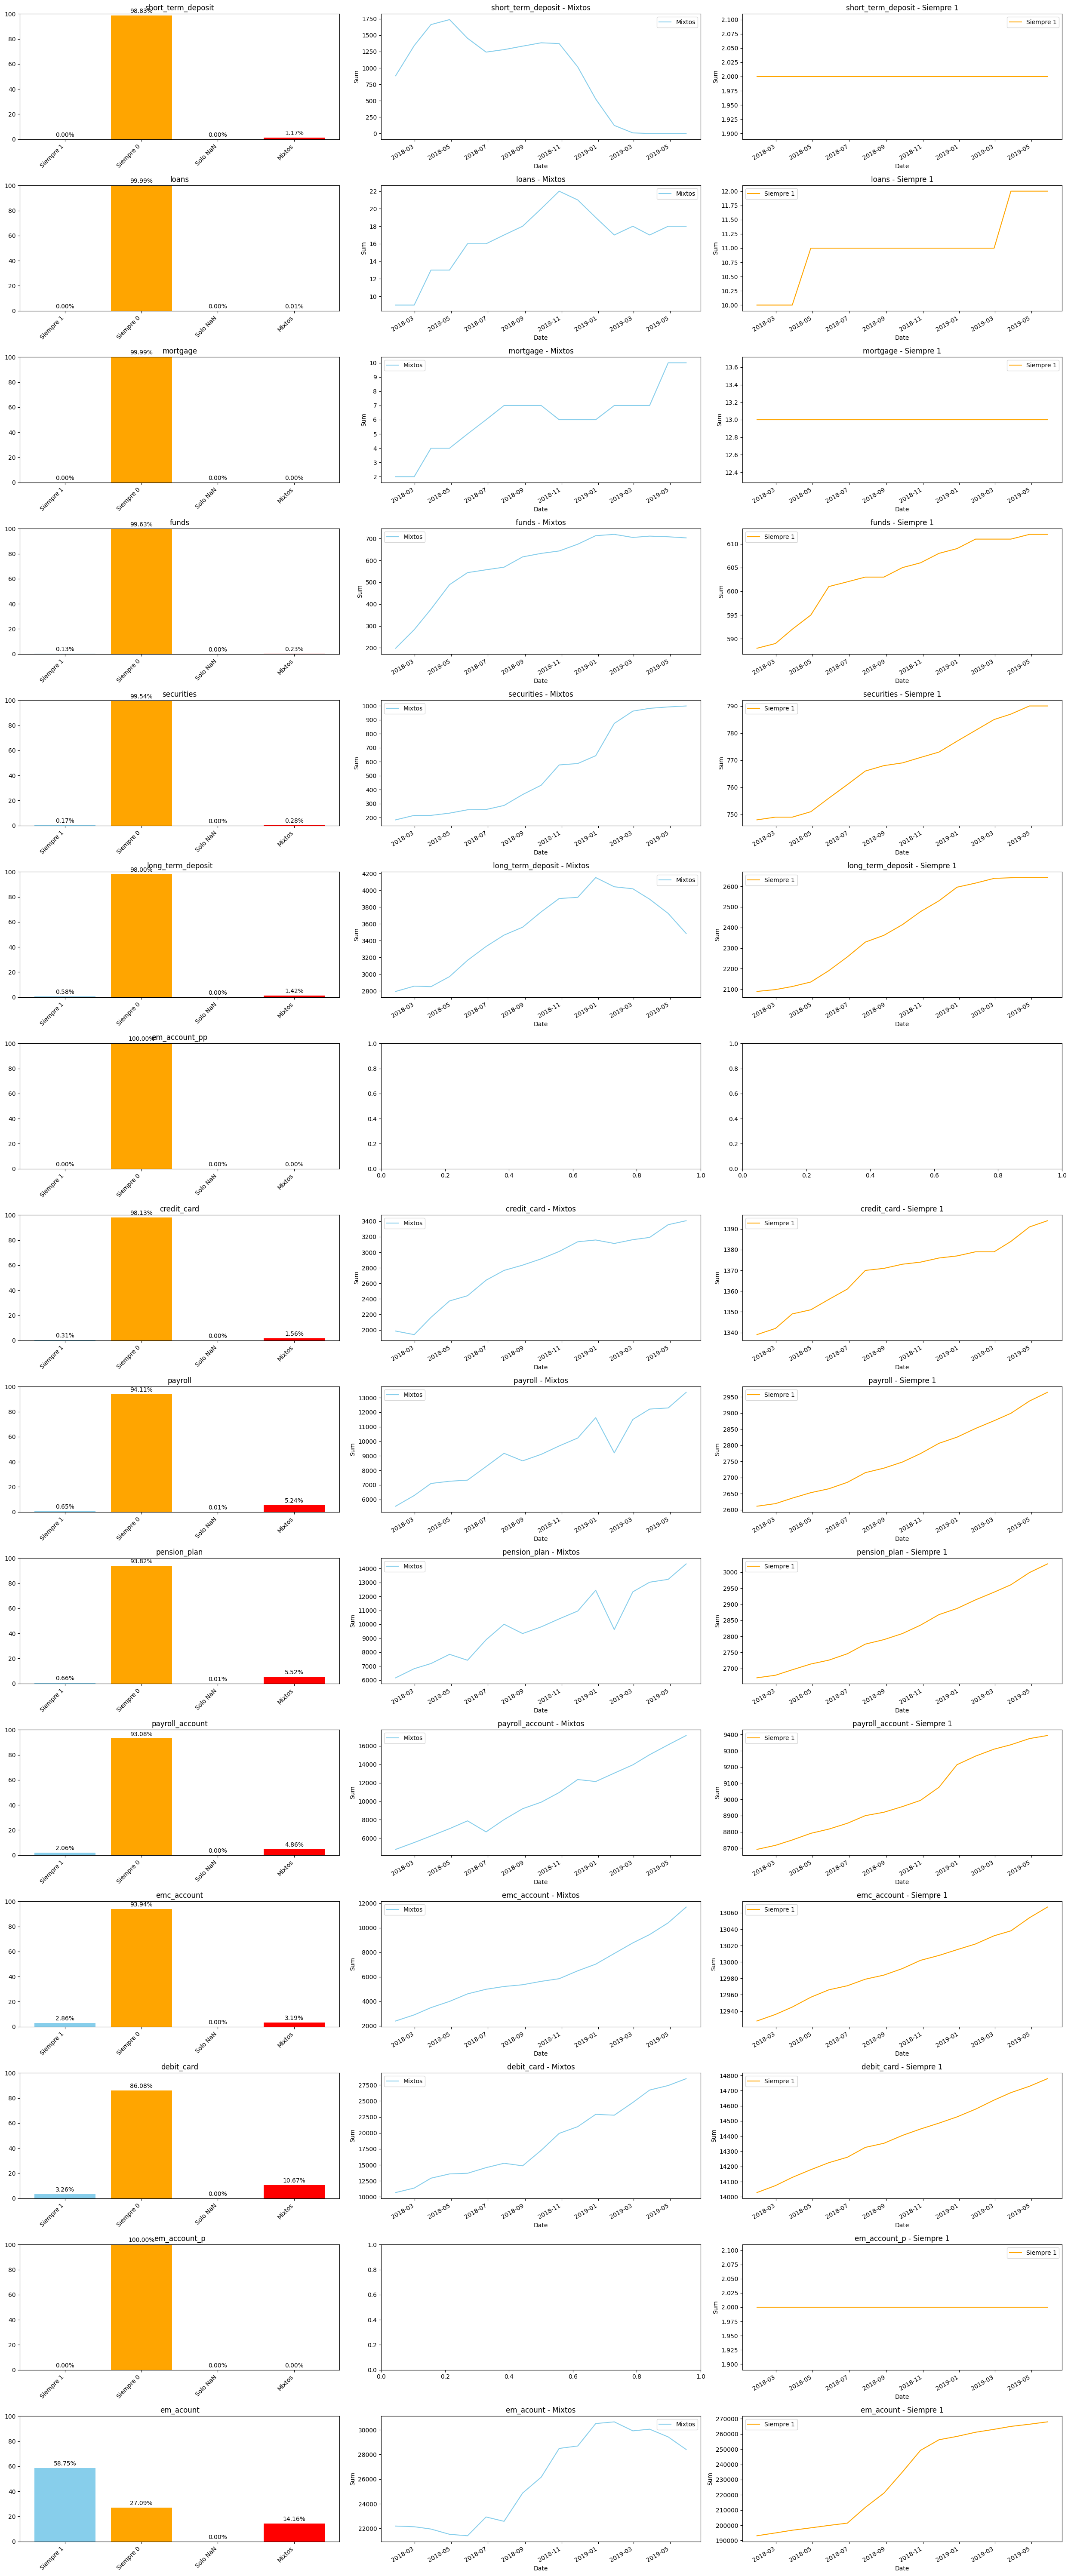

In [55]:
# Número total de clientes en el dataset
total_clientes = df_full['pk_cid'].nunique()

# Lista de variables a analizar
variables = [
    'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities',
    'long_term_deposit', 'em_account_pp', 'credit_card', 'payroll',
    'pension_plan', 'payroll_account', 'emc_account', 'debit_card',
    'em_account_p', 'em_acount'
]

# Crear una figura grande con 15 filas y 3 columnas de subplots
fig, axes = plt.subplots(nrows=15, ncols=3, figsize=(25, 60))
axes = axes.flatten()  # Aplanar la matriz de ejes para un fácil acceso

for i, var in enumerate(variables):
    # Calcular porcentajes
    pct_siempre_1 = (resultados[var]['siempre_1']['count'] / total_clientes) * 100
    pct_siempre_0 = (resultados[var]['siempre_0']['count'] / total_clientes) * 100
    pct_solo_nan = (resultados[var]['solo_nan']['count'] / total_clientes) * 100
    pct_mixtos = (resultados[var]['mixtos']['count'] / total_clientes) * 100

    # Datos para la barra
    categorias = ['Siempre 1', 'Siempre 0', 'Solo NaN', 'Mixtos']
    valores = [pct_siempre_1, pct_siempre_0, pct_solo_nan, pct_mixtos]

    # Gráfico de barras
    ax_bar = axes[i*3]
    bars = ax_bar.bar(categorias, valores, color=['skyblue', 'orange', 'green', 'red'])
    ax_bar.set_title(f'{var}')
    ax_bar.set_ylim(0, 100)

    # Añadir los valores encima de las barras
    for bar in bars:
        yval = bar.get_height()
        ax_bar.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')

    # Rotar las etiquetas en el eje x si es necesario
    ax_bar.set_xticklabels(categorias, rotation=45, ha='right')

    # Filtrar los clientes para la variable en la categoría 'mixtos'
    mixtos = df_full[df_full["pk_cid"].isin(resultados[var]["mixtos"]["pk_cid"])]

    # Filtrar los clientes para la variable en la categoría 'siempre_1'
    siempre_1 = df_full[df_full["pk_cid"].isin(resultados[var]["siempre_1"]["pk_cid"])]

    # Gráfico de líneas para los clientes mixtos
    ax_line_mixtos = axes[i*3+1]
    if not mixtos.empty:
        mixtos.groupby("pk_partition")[var].sum().plot(
            kind='line', ax=ax_line_mixtos, color='skyblue', label='Mixtos')
        ax_line_mixtos.set_title(f'{var} - Mixtos')
        ax_line_mixtos.set_xlabel('Date')
        ax_line_mixtos.set_ylabel('Sum')
        ax_line_mixtos.legend()

    # Gráfico de líneas para los clientes siempre 1
    ax_line_siempre_1 = axes[i*3+2]
    if not siempre_1.empty:
        siempre_1.groupby("pk_partition")[var].sum().plot(
            kind='line', ax=ax_line_siempre_1, color='orange', label='Siempre 1')
        ax_line_siempre_1.set_title(f'{var} - Siempre 1')
        ax_line_siempre_1.set_xlabel('Date')
        ax_line_siempre_1.set_ylabel('Sum')
        ax_line_siempre_1.legend()

# Ajustar la disposición de los subplots para que no se solapen
plt.tight_layout()

# Mostrar la figura completa
plt.show()

OJOOOO


Al revisar los datos, se detectaron inconsistencias en la columna entry_date para ciertos clientes, donde la fecha de registro variaba entre diferentes particiones de datos. Dado que la entry_date debe representar un evento único en el tiempo, cualquier variabilidad en esta columna es indicativa de un posible error de datos. Esto podría haber sido causado por errores en la carga de datos, actualizaciones incorrectas, o fallos en la sincronización de bases de datos. Para garantizar la calidad y consistencia de los datos, se ha decidido corregir la entry_date al valor más temprano registrado para cada cliente, ya que este valor refleja con mayor precisión el verdadero momento de registro del cliente.